<a href="https://colab.research.google.com/github/Ricardinho146/Alura_Challenge_Dados_2_Edit_Churn_Clientes/blob/main/Alura_Challenge_Dados_%5B2%C2%AA_Edi%C3%A7%C3%A3o%5D_Churn_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

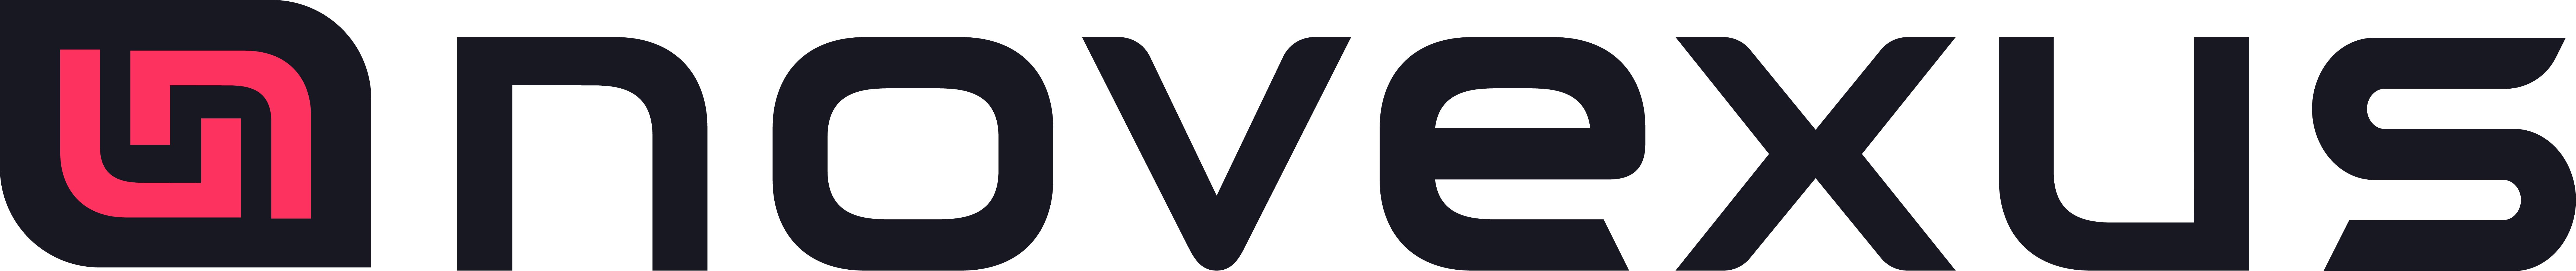



# Boas-vindas ao Challenge Dados 3ª Edição!

Você é a pessoa contratada como cientista de dados pela operadora de telecomunicações **Novexus**. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de reduzir a **Taxa de Evasão de Clientes**, também conhecida como **Churn Rate**.

Com base em sua experiência, você sugere como um passo inicial a identificação de clientes que teriam uma maior chance de deixar a Novexus. Por conta disso, todo o time percebe o quanto será interessante investigar algumas características de clientes ou dos planos de clientes para tentar **CLASSIFICAR** essas pessoas como potenciais candidatas a deixar a empresa ou não.

Neste desafio, você terá a oportunidade de explorar, tratar e modelar dados em busca de insights valiosos. Vamos focar na otimização e disponibilização do modelo para alcançar o melhor resultado possível na tomada de decisões estratégicas da Novexus. Além disso, temos uma tarefa especial para você: desenvolver um **APP Web** que facilite a classificação de potenciais clientes, tornando todo o processo mais ágil e eficiente.




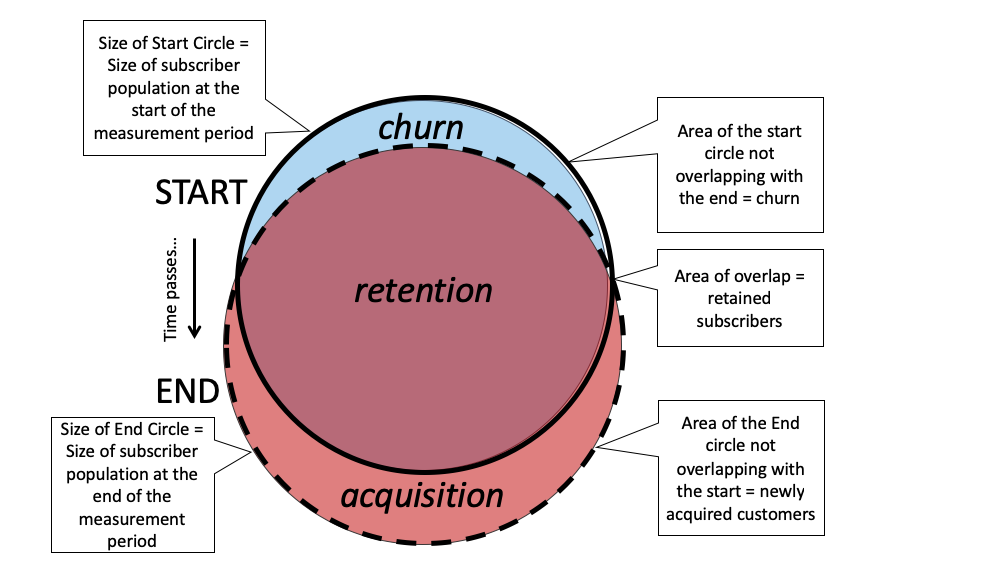

<h2>Importando as Bibliotecas</h2>


In [1]:
# Instalando a biblioteca pandas-profiling para a elaboração de relatórios
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7521826a4feabb01f0002c1fad513f5b36ecd6df7c5eb63a01bea7400bad26c3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import ydata_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("dark")

<ipython-input-2-3aeb17afdb10>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
sns.set(style="dark", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})


<h2>Montando o Dataframe</h2>

In [4]:
Dados_Novexus = pd.read_json('https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json')

In [5]:
# Note que há dados consolidados nas colunas "customer", "phone", "internet" e "account".
Dados_Novexus.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


<h2> Expandindo os dados consolidados das colunas "customer", "phone", "internet" e "account".</h2>

In [6]:
# Expandindo os dados da coluna "customer" e inserindo colunas no DataFrame
expanded_data1 = pd.json_normalize(Dados_Novexus['customer'])

# Expandindo os dados da coluna "phone" e inserindo colunas no DataFrame
expanded_data2 = pd.json_normalize(Dados_Novexus['phone'])

# Expandindo os dados da coluna "internet" e inserindo colunas no DataFrame
expanded_data3 = pd.json_normalize(Dados_Novexus['internet'])

# Expandindo os dados da coluna "internet" e inserindo colunas no DataFrame
expanded_data4 = pd.json_normalize(Dados_Novexus['account'])
Dados_Novexus = pd.concat([Dados_Novexus, expanded_data1, expanded_data2, expanded_data3, expanded_data4], axis=1)

# Excluir as colunas originais 'customer','phone','internet'e'account'
Dados_Novexus.drop(columns=['customer','phone','internet','account'], inplace=True)

In [7]:
# Verificandos as primeiras 5 linas do Dataframe após a expanção das colunas
Dados_Novexus.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Dicionário de dados

* `customerID`: numero de identificação único de cada cliente;
* `Churn`: se o cliente deixou ou não a empresa;
* `gender`: gênero (masculino e feminino);
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos;
* `Partner`:  se o cliente possui ou não um parceiro ou parceira;
* `Dependents`: se o cliente possui ou não dependentes;
* `tenure`:  meses de contrato do cliente;
* `PhoneService`: assinatura de serviço telefônico;
* `MultipleLines`: assisnatura de mais de uma linha de telefone;
* `InternetService`: assinatura de um provedor internet;
* `OnlineSecurity`: assinatura adicional de segurança online;
* `OnlineBackup`: assinatura adicional de backup online;
* `DeviceProtection`: assinatura adicional de proteção no dispositivo;
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera;
* `StreamingTV`: assinatura de TV a cabo;
* `StreamingMovies`: assinatura de streaming de filmes;
* `Contract`: tipo de contrato;
* `PaperlessBilling`: se o cliente prefere receber online a fatura;
* `PaymentMethod`: forma de pagamento;
* `Charges.Monthly`: total de todos os serviços do cliente por mês;
* `Charges.Total`: total gasto pelo cliente;

In [8]:
# Verificando tipo do Dado de cada coluna
Dados_Novexus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


<h2> Convertendo os dados nulos da coluna "Churn" para "NaN".<h2>

In [9]:
# Remover espaços em branco dos valores e substituir valores vazios por NaN
Dados_Novexus['Churn'] = Dados_Novexus['Churn'].str.replace(' ', '').replace('', pd.NA)
Dados_Novexus['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<h2> Como a coluna Charges.Total é referente ao valor total gasto pelo cliente, se faz necessário a conversão do tipo do dados de 'object' para 'float'.</h2>

In [10]:

# Remover espaços em branco dos valores e substituir valores vazios por NaN
Dados_Novexus['Charges.Total'] = Dados_Novexus['Charges.Total'].str.replace(' ', '').replace('', pd.NA)

# Converter para float
Dados_Novexus['Charges.Total'] = pd.to_numeric(Dados_Novexus['Charges.Total'], errors='coerce')

# Verificando novamente tipo do Dado de cada coluna
Dados_Novexus.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


<h2> Realizando uma analise estatistica descritiva dos dados numéricos.</h2>

In [11]:
Dados_Novexus.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


<h2> Realizando a analise estatistica descritiva dos dados numéricos e categóricos.</h2>

In [12]:
Dados_Novexus.astype('object').describe()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7043,7267,7267,7267,7267,7267,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.00,7256.0
unique,7267,2,2,2,2,2,73,2,3,3,...,3,3,3,3,3,3,2,4,1585.00,6530.0
top,0002-ORFBO,No,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,20.2
freq,1,5174,3675,6085,3749,5086,634,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,65.00,11.0


<h2> Verificando a presença de dados nulos em cada coluna do Dataframe. Como podemos ver abaixo somente as colunas "Churn" e "Charges.Total" contem dados nulos ou NAN.</h2>

In [13]:
# Verificando a quantidade de valores null ou NAN em cada coluna
print(Dados_Novexus.isnull().sum())

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [14]:
profile = ProfileReport(Dados_Novexus)
profile.to_file("Novexus_Relatorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<h2> Removendo os dados nulos que representam somente  0.1% ou 224 linhas do Dataframe.</h2>

In [15]:
Dados_Novexus = Dados_Novexus.dropna(axis=0)
# Verificando a quantidade de valores null ou NAN em cada coluna
print(Dados_Novexus.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


<h2> Visualização de Dados:</h2>

* Distribuição da variável gênero por Churn

* Distribuição da variável InternetService por Churn

* Distribuição da variável OnlineSecurity por Churn

* Distribuição da variável OnlineBackup por Churn

* Distribuição da variável DeviceProtection por Churn

* Distribuição da variável TechSupport por Churn

* Distribuição da variável Contract por Churn

* Distribuição da variável PaymentMethod por Churn

* Distribuição da variável SeniorCitizen por Churn

* Boxplot para as variáveis numéricas




<h2> Análisando o comportamento das Colunas categoricas em relação ao "Churn".</h2>

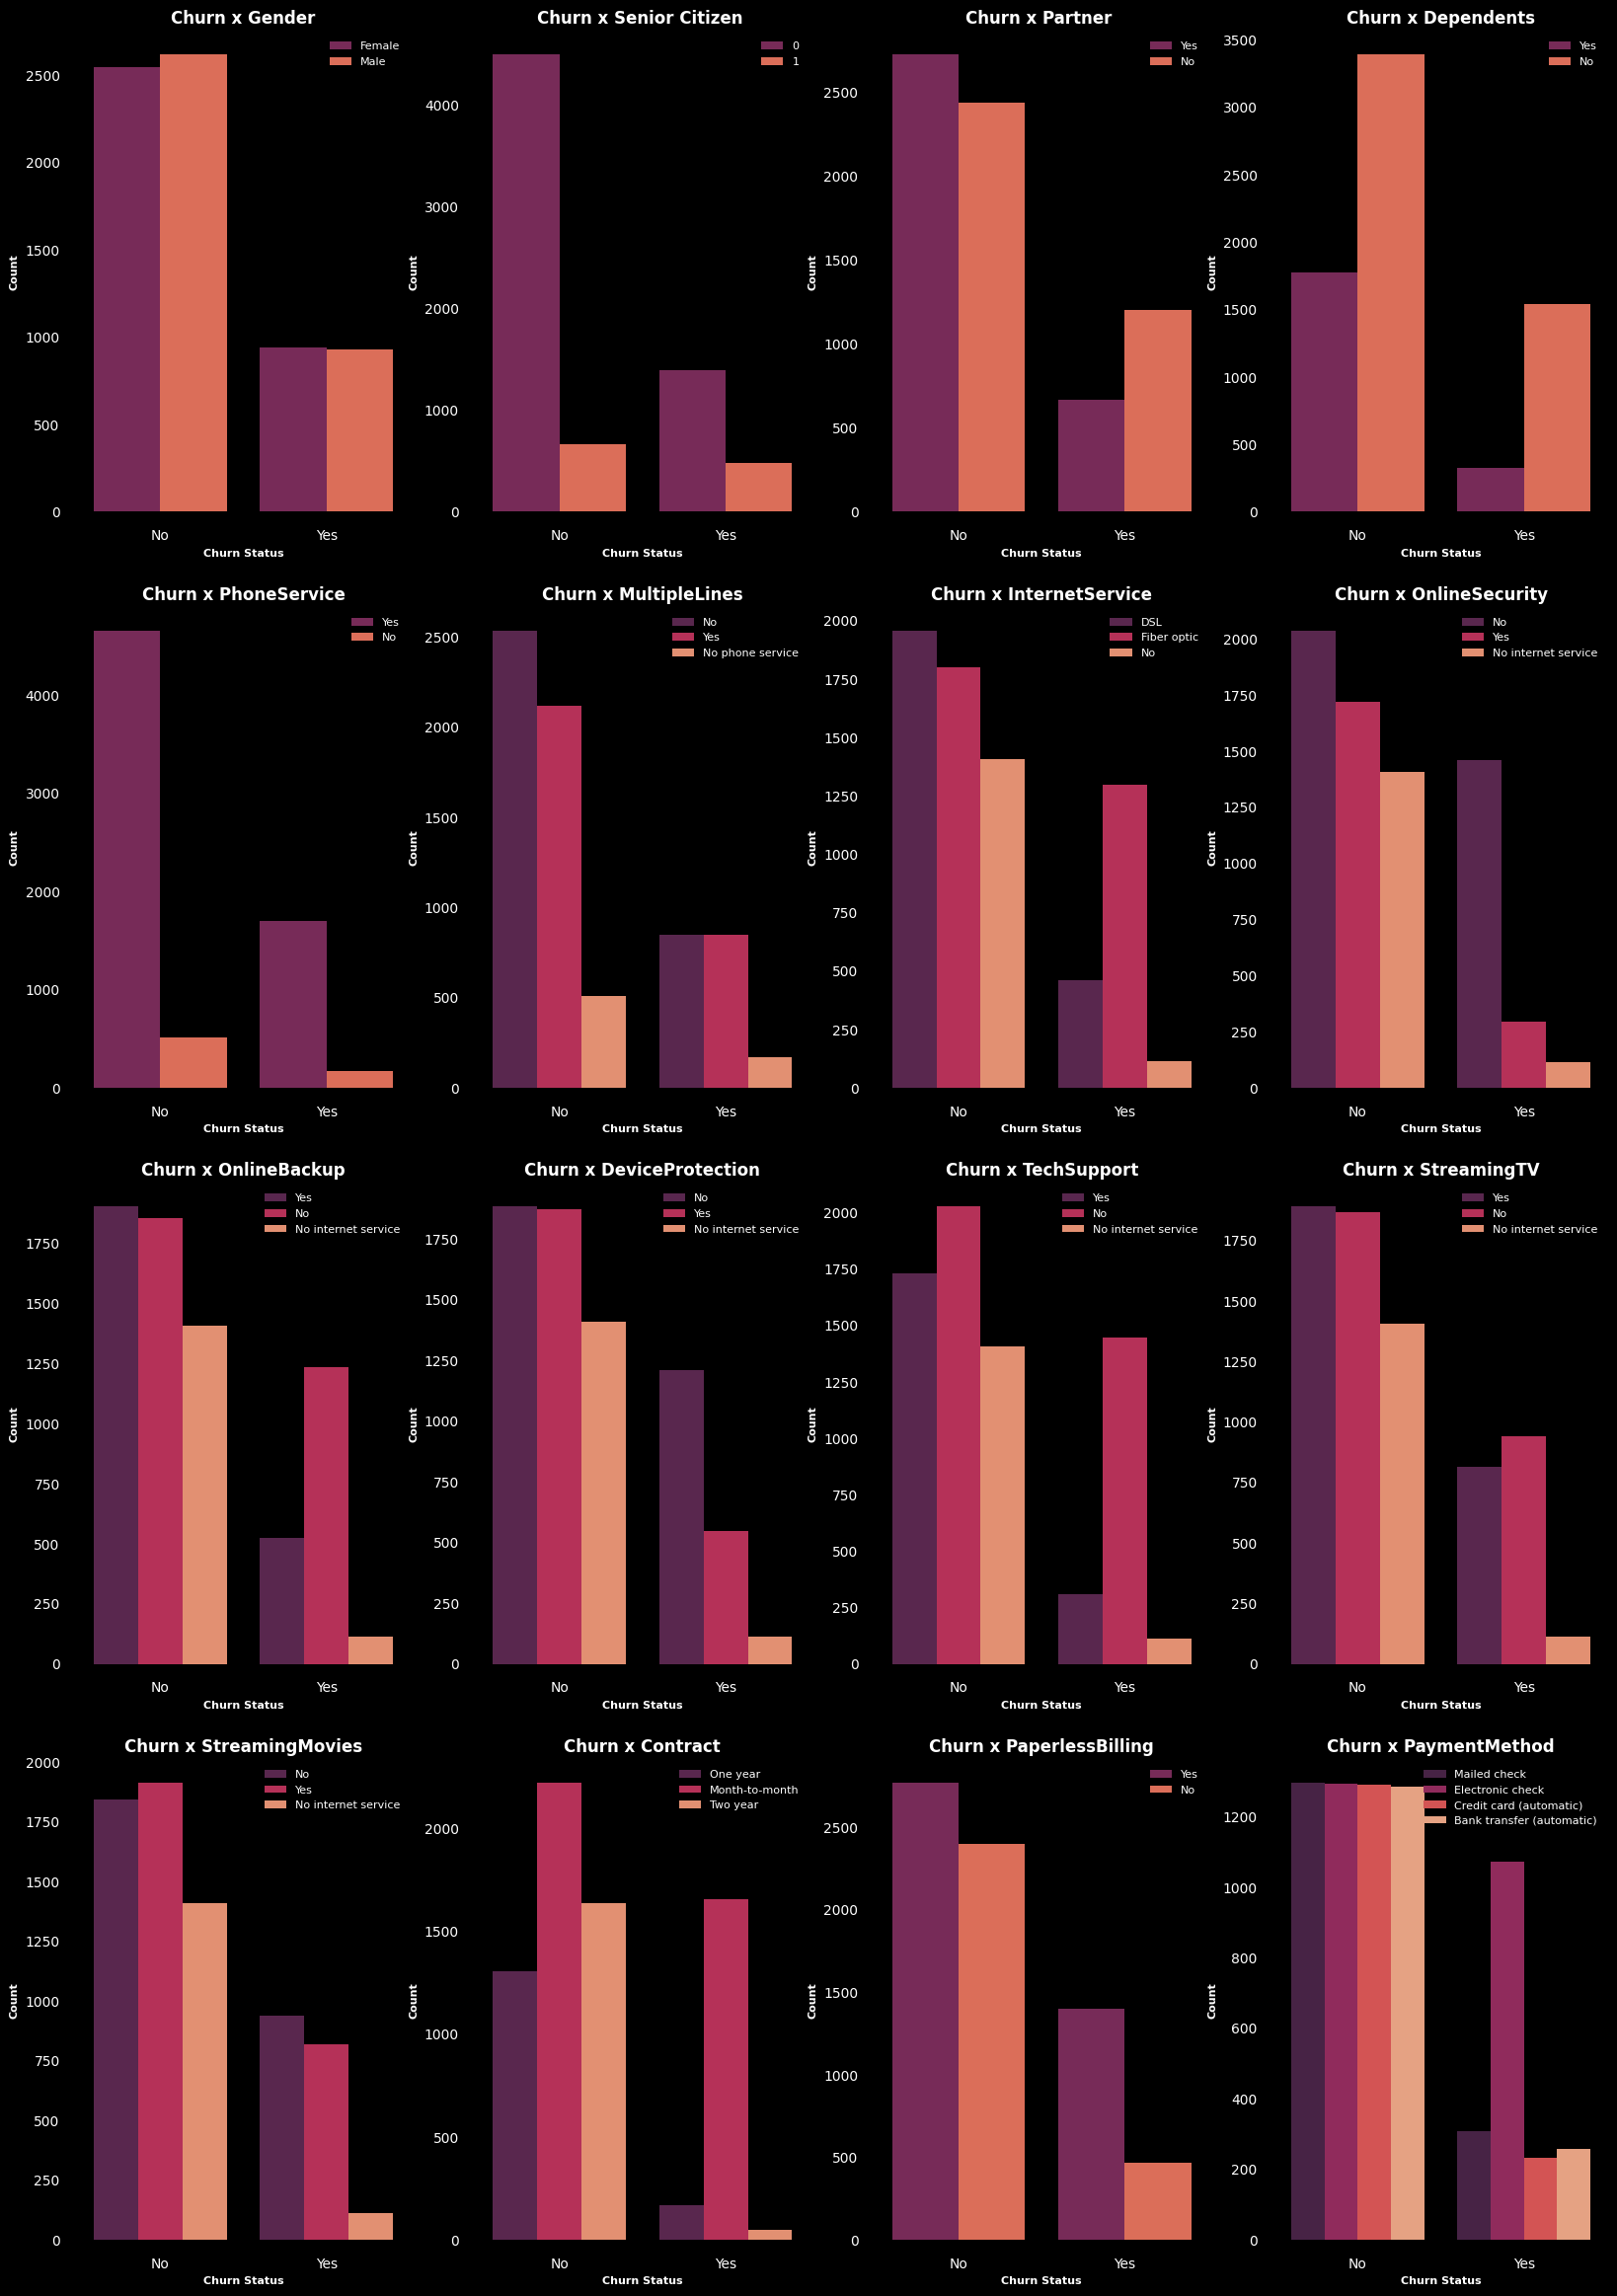

In [16]:
fig = plt.figure(figsize=(20, 120))

ax1 = plt.subplot(16, 4, 1)
ax1 = sns.countplot(data= Dados_Novexus, x="Churn", hue="gender",palette = 'rocket', lw = 0)
ax1 = plt.title("Churn x Gender", fontsize = 12, fontweight = 'bold')
ax1 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax1 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax1 = plt.xticks(rotation = 0, fontsize = 10)
ax1 = plt.yticks(rotation = 0, fontsize = 10)
ax1 = plt.legend( prop = { "size": 8 }, loc ="best",frameon=False, edgecolor ='none')
ax1 = plt.box(False)

ax2 = plt.subplot(16, 4, 2)
ax2 = sns.countplot(data= Dados_Novexus, x="Churn", hue="SeniorCitizen",palette = 'rocket', lw = 0)
ax2 = plt.title("Churn x Senior Citizen ", fontsize = 12, fontweight = 'bold')
ax2 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax2 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax2 = plt.xticks(rotation = 0, fontsize = 10)
ax2 = plt.yticks(rotation = 0, fontsize = 10)
ax2 = plt.legend( prop = { "size": 8 }, loc ="best",frameon=False, edgecolor ='none')
ax2 = plt.box(False)

ax3 = plt.subplot(16, 4, 3)
ax3 = sns.countplot(data= Dados_Novexus, x="Churn", hue="Partner",palette = 'rocket', lw = 0)
ax3 = plt.title("Churn x Partner ", fontsize = 12, fontweight = 'bold')
ax3 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax3 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax3 = plt.xticks(rotation = 0, fontsize = 10)
ax3 = plt.yticks(rotation = 0, fontsize = 10)
ax3 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax3 = plt.box(False)

ax4 = plt.subplot(16, 4, 4)
ax4 = sns.countplot(data= Dados_Novexus, x="Churn", hue="Dependents",palette = 'rocket', lw = 0)
ax4 = plt.title("Churn x Dependents", fontsize = 12, fontweight = 'bold')
ax4 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax4 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax4 = plt.xticks(rotation = 0, fontsize = 10)
ax4 = plt.yticks(rotation = 0, fontsize = 10)
ax4 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax4 = plt.box(False)

ax5 = plt.subplot(16, 4, 5)
ax5 = sns.countplot(data= Dados_Novexus, x="Churn", hue="PhoneService",palette = 'rocket', lw = 0)
ax5 = plt.title("Churn x PhoneService", fontsize = 12, fontweight = 'bold')
ax5 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax5 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax5 = plt.xticks(rotation = 0, fontsize = 10)
ax5 = plt.yticks(rotation = 0, fontsize = 10)
ax5 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax5 = plt.box(False)

ax6 = plt.subplot(16, 4, 6)
ax6 = sns.countplot(data= Dados_Novexus, x="Churn", hue="MultipleLines",palette = 'rocket', lw = 0)
ax6 = plt.title("Churn x MultipleLines", fontsize = 12, fontweight = 'bold')
ax6 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax6 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax6 = plt.xticks(rotation = 0, fontsize = 10)
ax6 = plt.yticks(rotation = 0, fontsize = 10)
ax6 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax6 = plt.box(False)

ax7 = plt.subplot(16, 4, 7)
ax7 = sns.countplot(data= Dados_Novexus, x="Churn", hue="InternetService",palette = 'rocket', lw = 0)
ax7 = plt.title("Churn x InternetService", fontsize = 12, fontweight = 'bold')
ax7 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax7 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax7 = plt.xticks(rotation = 0, fontsize = 10)
ax7 = plt.yticks(rotation = 0, fontsize = 10)
ax7 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax7 = plt.box(False)

ax8 = plt.subplot(16, 4, 8)
ax8 = sns.countplot(data= Dados_Novexus, x="Churn", hue="OnlineSecurity",palette = 'rocket', lw = 0)
ax8 = plt.title("Churn x OnlineSecurity", fontsize = 12, fontweight = 'bold')
ax8 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax8 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax8 = plt.xticks(rotation = 0, fontsize = 10)
ax8 = plt.yticks(rotation = 0, fontsize = 10)
ax8 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax8 = plt.box(False)

ax9 = plt.subplot(16, 4, 9)
ax9 = sns.countplot(data= Dados_Novexus, x="Churn", hue="OnlineBackup",palette = 'rocket', lw = 0)
ax9 = plt.title("Churn x OnlineBackup", fontsize = 12, fontweight = 'bold')
ax9 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax9 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax9 = plt.xticks(rotation = 0, fontsize = 10)
ax9 = plt.yticks(rotation = 0, fontsize = 10)
ax9 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax9 = plt.box(False)

ax10 = plt.subplot(16, 4, 10)
ax10 = sns.countplot(data= Dados_Novexus, x="Churn", hue="DeviceProtection",palette = 'rocket', lw = 0)
ax10 = plt.title("Churn x DeviceProtection", fontsize = 12, fontweight = 'bold')
ax10 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax10 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax10 = plt.xticks(rotation = 0, fontsize = 10)
ax10 = plt.yticks(rotation = 0, fontsize = 10)
ax10 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax10 = plt.box(False)

ax11 = plt.subplot(16, 4, 11)
ax11 = sns.countplot(data= Dados_Novexus, x="Churn", hue="TechSupport",palette = 'rocket', lw = 0)
ax11 = plt.title("Churn x TechSupport", fontsize = 12, fontweight = 'bold')
ax11 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax11 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax11 = plt.xticks(rotation = 0, fontsize = 10)
ax11 = plt.yticks(rotation = 0, fontsize = 10)
ax11 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax11 = plt.box(False)

ax12 = plt.subplot(16, 4, 12)
ax12 = sns.countplot(data= Dados_Novexus, x="Churn", hue="StreamingTV",palette = 'rocket', lw = 0)
ax12 = plt.title("Churn x StreamingTV", fontsize = 12, fontweight = 'bold')
ax12 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax12 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax12 = plt.xticks(rotation = 0, fontsize = 10)
ax12 = plt.yticks(rotation = 0, fontsize = 10)
ax12 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax12 = plt.box(False)

ax13 = plt.subplot(16, 4, 13)
ax13 = sns.countplot(data= Dados_Novexus, x="Churn", hue="StreamingMovies",palette = 'rocket', lw = 0)
ax13 = plt.title("Churn x StreamingMovies", fontsize = 12, fontweight = 'bold')
ax13 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax13 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax13 = plt.xticks(rotation = 0, fontsize = 10)
ax13 = plt.yticks(rotation = 0, fontsize = 10)
ax13 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax13 = plt.box(False)

ax14 = plt.subplot(16, 4, 14)
ax14 = sns.countplot(data= Dados_Novexus, x="Churn", hue="Contract",palette = 'rocket', lw = 0)
ax14 = plt.title("Churn x Contract", fontsize = 12, fontweight = 'bold')
ax14 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax14 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax14 = plt.xticks(rotation = 0, fontsize = 10)
ax14 = plt.yticks(rotation = 0, fontsize = 10)
ax14 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax14 = plt.box(False)

ax15 = plt.subplot(16, 4, 15)
ax15 = sns.countplot(data= Dados_Novexus, x="Churn", hue="PaperlessBilling",palette = 'rocket', lw = 0)
ax15 = plt.title("Churn x PaperlessBilling", fontsize = 12, fontweight = 'bold')
ax15 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax15 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax15 = plt.xticks(rotation = 0, fontsize = 10)
ax15 = plt.yticks(rotation = 0, fontsize = 10)
ax15 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax15 = plt.box(False)

ax16 = plt.subplot(16, 4, 16)
ax16 = sns.countplot(data= Dados_Novexus, x="Churn", hue="PaymentMethod",palette = 'rocket', lw = 0)
ax16 = plt.title("Churn x PaymentMethod", fontsize = 12, fontweight = 'bold')
ax16 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax16 = plt.ylabel('Count', fontsize = 8, fontweight = 'semibold')
ax16 = plt.xticks(rotation = 0, fontsize = 10)
ax16 = plt.yticks(rotation = 0, fontsize = 10)
ax16 = plt.legend( prop = { "size": 8 }, loc ="best", frameon=False, edgecolor ='none')
ax16 = plt.box(False)

plt.show()

<h2> Análisando o comportamento das Colunas Numéricas em relação ao "Churn".</h2>

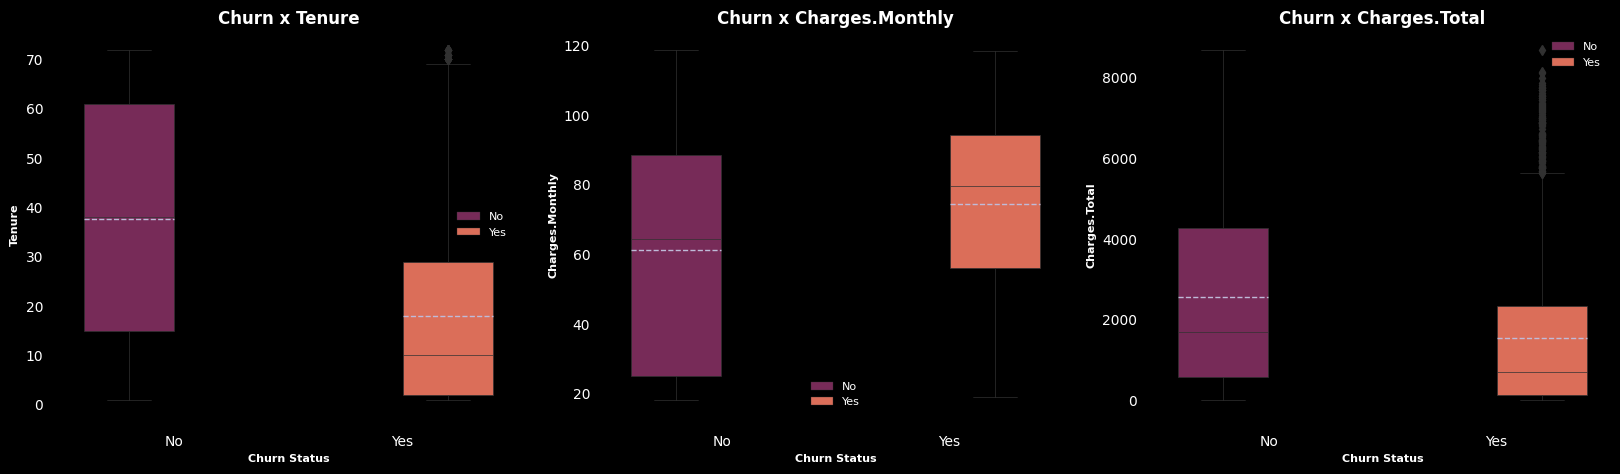

In [17]:


fig = plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 3, 1)
ax1 = sns.boxplot(data= Dados_Novexus, x ="Churn", y="tenure", hue = "Churn", palette = 'rocket', linewidth = 0.5,
                  meanline=True, showmeans=True, showcaps = True, showbox = True)
ax1 = plt.title("Churn x Tenure", fontsize = 12, fontweight = 'bold')
ax1 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax1 = plt.ylabel('Tenure', fontsize = 8, fontweight = 'semibold')
ax1 = plt.xticks(rotation = 0, fontsize = 10)
ax1 = plt.yticks(rotation = 0, fontsize = 10)
ax1 = plt.legend( prop = { "size": 8 }, loc ="best",frameon=False, edgecolor ='none')
ax1 = plt.box(False)

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.boxplot(data= Dados_Novexus, x ="Churn", y="Charges.Monthly", hue = "Churn", palette = 'rocket', linewidth = 0.5,
                  meanline=True, showmeans=True, showcaps = True, showbox = True)
ax2 = plt.title("Churn x Charges.Monthly", fontsize = 12, fontweight = 'bold')
ax2 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax2 = plt.ylabel('Charges.Monthly', fontsize = 8, fontweight = 'semibold')
ax2 = plt.xticks(rotation = 0, fontsize = 10)
ax2 = plt.yticks(rotation = 0, fontsize = 10)
ax2 = plt.legend( prop = { "size": 8 }, loc ="best",frameon=False, edgecolor ='none')
ax2 = plt.box(False)

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.boxplot(data= Dados_Novexus, x ="Churn", y="Charges.Total", hue = "Churn", palette = 'rocket', linewidth = 0.5,
                  meanline=True, showmeans=True, showcaps = True, showbox = True)
ax3 = plt.title("Churn x Charges.Total", fontsize = 12, fontweight = 'bold')
ax3 = plt.xlabel('Churn Status', fontsize = 8, fontweight = 'semibold')
ax3 = plt.ylabel('Charges.Total', fontsize = 8, fontweight = 'semibold')
ax3 = plt.xticks(rotation = 0, fontsize = 10)
ax3 = plt.yticks(rotation = 0, fontsize = 10)
ax3 = plt.legend( prop = { "size": 8 }, loc ="best",frameon=False, edgecolor ='none')
ax3 = plt.box(False)

plt.show()

<h2> Análise correlação.</h2>

In [18]:
! pip install dython

In [19]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

# Removendo a coluna "customerID" do dataframe pois não faz sentido para análise

df_analise = Dados_Novexus.drop("customerID", axis =1)

# Gerando uma lista com as colunas de dados categóricos
categorical_features=identify_nominal_columns(df_analise)
categorical_features

['Churn',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

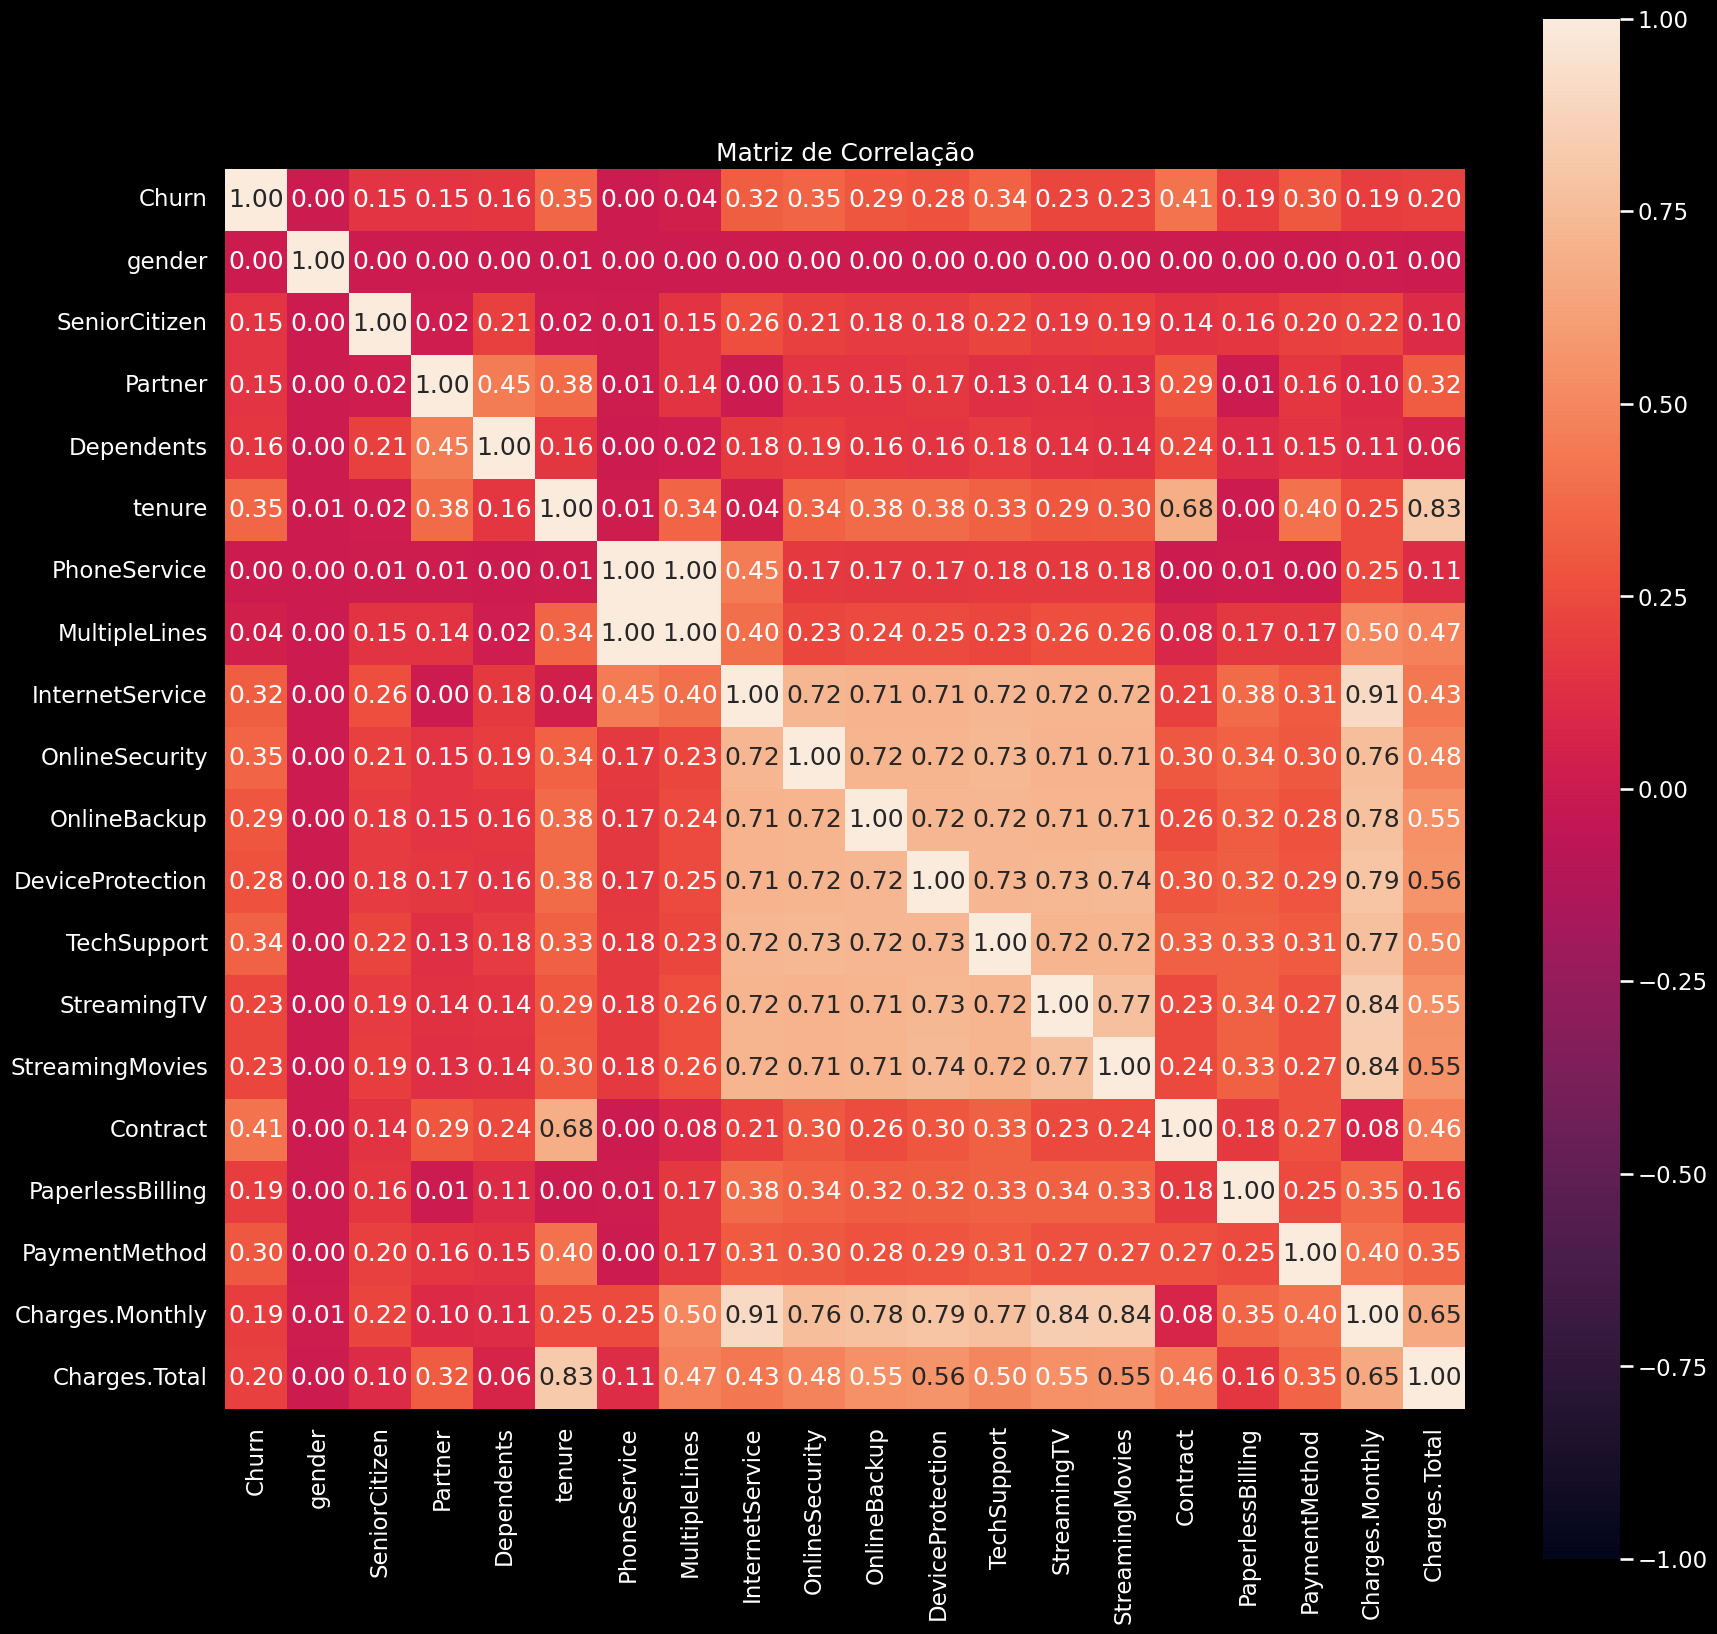

In [20]:
associations(df_analise, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',
              ax=None, figsize=(20,20),annot=True, fmt='.2f', cmap='rocket', sv_color='silver', cbar=True, vmax=1.0,
             vmin=None, plot=True, compute_only=False, clustering=False, title="Matriz de Correlação", filename=None);

<h2> One-Hot Encoding</h2>

In [21]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.2 MB/s eta 0:00:00


In [22]:
import category_encoders as ce

In [23]:
from category_encoders.one_hot import OneHotEncoder

In [24]:
one_hot_enc = OneHotEncoder(cols =['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService',
                                   'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                                   'Contract','PaperlessBilling','PaymentMethod'])

In [25]:
df_OHE = one_hot_enc.fit_transform(df_analise)

In [26]:
df_OHE.head()

,Churn,gender_1,gender_2,SeniorCitizen,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,...,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Charges.Monthly,Charges.Total
0,No,1,0,0,1,0,1,0,9,1,...,0,0,1,0,1,0,0,0,65.6,593.30
1,No,0,1,0,0,1,0,1,9,1,...,1,0,0,1,1,0,0,0,59.9,542.40
2,Yes,0,1,0,0,1,0,1,4,1,...,1,0,1,0,0,1,0,0,73.9,280.85
3,Yes,0,1,1,1,0,0,1,13,1,...,1,0,1,0,0,1,0,0,98.0,1237.85
4,Yes,1,0,1,1,0,0,1,3,1,...,1,0,1,0,1,0,0,0,83.9,267.40


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
lb = LabelEncoder()

In [29]:
df_OHE['Churn']  = lb.fit_transform(df_OHE['Churn'])
df_OHE.head()

,Churn,gender_1,gender_2,SeniorCitizen,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,...,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,Charges.Monthly,Charges.Total
0,0,1,0,0,1,0,1,0,9,1,...,0,0,1,0,1,0,0,0,65.6,593.30
1,0,0,1,0,0,1,0,1,9,1,...,1,0,0,1,1,0,0,0,59.9,542.40
2,1,0,1,0,0,1,0,1,4,1,...,1,0,1,0,0,1,0,0,73.9,280.85
3,1,0,1,1,1,0,0,1,13,1,...,1,0,1,0,0,1,0,0,98.0,1237.85
4,1,1,0,1,1,0,0,1,3,1,...,1,0,1,0,1,0,0,0,83.9,267.40


# Balanceando a variável target "Churn".

In [30]:
! pip install -U Imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: Imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [31]:
x = df_OHE.drop("Churn", axis =1)
y = df_OHE["Churn"]

In [32]:
# Verificando a distribuição da coluna Churn com a contagem de cada ocorrência (0 ou 1)
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

<Axes: title={'center': 'Churn Distribution'}, ylabel='Churn'>

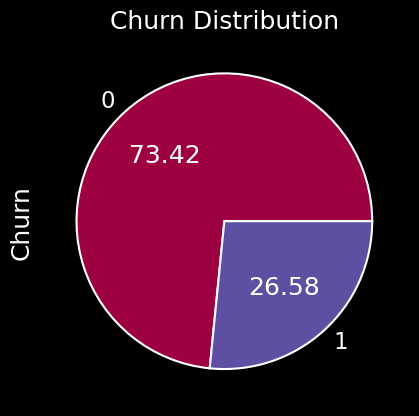

In [33]:
# Verificando a distribuição da coluna Churn em um gráfico de pizza com a % de cada ocorrência (0 ou 1)
y.value_counts().plot.pie(autopct = '%.2f', cmap='Spectral', title = "Churn Distribution")

<h2> Random Undersampling.</h2>

In [34]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
rus = RandomUnderSampler(sampling_strategy=1) # Float
x_rus, y_rus = rus.fit_resample(x,y)

y_rus.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

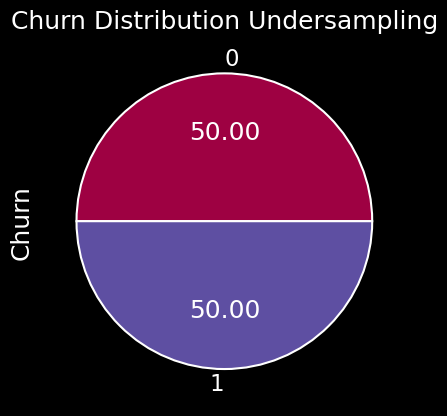

In [36]:
y_rus.value_counts().plot.pie(autopct = '%.2f', cmap='Spectral', title= 'Churn Distribution Undersampling', ylabel='Churn');

<h2> Random Oversampling.</h2>

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros = RandomOverSampler(sampling_strategy=1)
x_ros, y_ros = ros.fit_resample(x,y)

y_ros.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

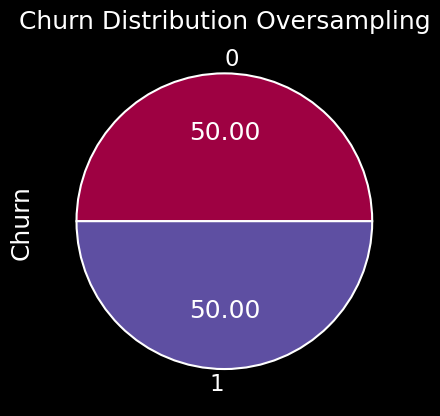

In [39]:
y_ros.value_counts().plot.pie(autopct = '%.2f', cmap='Spectral', title= 'Churn Distribution Oversampling', ylabel='Churn');

# Testando Modelos de Classificação

<h2> Random Forest Classifer</h2>

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, top_k_accuracy_score, confusion_matrix, classification_report, get_scorer_names
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

In [41]:
#get_scorer_names()

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0)

In [43]:
modelo_RFC = RandomForestClassifier()
modelo_RFC.fit(x_train, y_train)
y_pred = modelo_RFC.predict(x_test)

Testando o modelo com dados Udersampling

In [44]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size = 0.3, random_state =0)

In [45]:
modelo_RFC1 = RandomForestClassifier()
modelo_RFC1.fit(x_train1, y_train1)
y_pred1 = modelo_RFC1.predict(x_test1)

Testando o modelo com dados Oversampling

In [46]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_ros, y_ros, test_size = 0.3, random_state =0)

In [47]:
modelo_RFC2 = RandomForestClassifier()
modelo_RFC2.fit(x_train2, y_train2)
y_pred2 = modelo_RFC2.predict(x_test2)

<h2> Avaliando os resultados dos modelos treinadados com os 3 datasets:

* **Dados Desbalanceados**: Onde não houve um tratamento e proporção dos dados são de 73% de Churn = No (0) e 27% de Churn = Yes (1),  um total de 7.032 linhas;

* **Dados Unsersampling**: Onde  houve um tratamento dos dados reduzindo a ocorrência "No" e igualando a ocorrência de "Yes". Sendo assim o numero total de dados reduziu para 3.738 linhas;

* **Dados Oversampling**: Onde  houve um tratamento dos dados aumentando a ocorrência "Yes" e igualando a ocorrência de "No". Sendo assim o numero total de dados reduziu para 10.326 linhas;

In [48]:
print('Dados Desbalanceados: \n \n',classification_report(y_test, y_pred))

print('-------------------------------------------------------')

print('Dados Undersampling: \n \n',classification_report(y_test1, y_pred1))

print('-------------------------------------------------------')

print('Dados Oversampling: \n \n',classification_report(y_test2, y_pred2))

print('-------------------------------------------------------')


Dados Desbalanceados: 
 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1543
           1       0.62      0.47      0.54       567

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110

-------------------------------------------------------
Dados Undersampling: 
 
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       561
           1       0.75      0.78      0.76       561

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122

-------------------------------------------------------
Dados Oversampling: 
 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1522
           1       0.84      0.94      0.89      1

<h2> GradientBoostingClassifier</h2>


In [49]:
# Instalar o pacote
! pip install xgboost

In [50]:
from xgboost import XGBClassifier

In [51]:
modelo_XGBC = XGBClassifier()
modelo_XGBC.fit(x_train, y_train)
y_pred_XGBC = modelo_XGBC.predict(x_test)

In [52]:
modelo_XGBC1 = XGBClassifier()
modelo_XGBC1.fit(x_train1, y_train1)
y_pred_XGBC1 = modelo_XGBC1.predict(x_test1)

In [53]:
modelo_XGBC2 = XGBClassifier()
modelo_XGBC2.fit(x_train2, y_train2)
y_pred_XGBC2 = modelo_XGBC2.predict(x_test2)

In [54]:
print('Dados Desbalanceados XGBC: \n \n',classification_report(y_test, y_pred_XGBC))

print('-------------------------------------------------------')

print('Dados Undersampling: \n \n',classification_report(y_test1, y_pred_XGBC1))

print('-------------------------------------------------------')

print('Dados Oversampling: \n \n',classification_report(y_test2, y_pred_XGBC2))

print('-------------------------------------------------------')


Dados Desbalanceados XGBC: 
 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1543
           1       0.61      0.49      0.54       567

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

-------------------------------------------------------
Dados Undersampling: 
 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75       561
           1       0.74      0.76      0.75       561

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122

-------------------------------------------------------
Dados Oversampling: 
 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1522
           1       0.82      0.91      0.86  

<h2> Avaliando os resultados com a função CrossValidation.</h2>

In [55]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

In [56]:
# Avaliando os Resultados com o CrossValidation:

resultados_RFC2 = cross_val_predict(modelo_RFC2, x_train2, y_train2, cv=20)

resultados_XGBC2 = cross_val_predict(modelo_XGBC2, x_train2, y_train2, cv=20)

print("Resultado Modelo RandomForestClassifier:\n\n"    , classification_report(y_train2, resultados_RFC2))

print('-------------------------------------------------------')

print("Resultado Modelo GradientBoostingClassifier:\n\n", classification_report(y_train2, resultados_XGBC2))

print('-------------------------------------------------------')

Resultado Modelo RandomForestClassifier:

               precision    recall  f1-score   support

           0       0.93      0.82      0.87      3641
           1       0.84      0.94      0.88      3587

    accuracy                           0.88      7228
   macro avg       0.88      0.88      0.88      7228
weighted avg       0.88      0.88      0.88      7228

-------------------------------------------------------
Resultado Modelo GradientBoostingClassifier:

               precision    recall  f1-score   support

           0       0.90      0.79      0.84      3641
           1       0.81      0.91      0.86      3587

    accuracy                           0.85      7228
   macro avg       0.86      0.85      0.85      7228
weighted avg       0.86      0.85      0.85      7228

-------------------------------------------------------


<h2> RandomizedSearchCV</h2>

In [57]:
from sklearn.model_selection import RandomizedSearchCV


# Defina uma distribuição de hiperparâmetros para amostragem aleatória
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}

# Crie o modelo RandomForestClassifier
modelo_RFC2 = RandomForestClassifier()

# Use o RandomizedSearchCV para realizar uma pesquisa aleatória de hiperparâmetros
random_search_RFC = RandomizedSearchCV(modelo_RFC2, param_distributions=param_dist, n_iter=100, cv=10, scoring='accuracy', n_jobs=-1)
random_search_RFC.fit(x_train2, y_train2)

# Imprima os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", random_search_RFC.best_params_)

# Imprima a pontuação (score) do melhor modelo
print("Melhor Pontuação (Accuracy):", random_search_RFC.best_score_)



Melhores Hiperparâmetros: {'n_estimators': 40, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 90, 'bootstrap': False}
Melhor Pontuação (Accuracy): 0.8844762320739609


In [58]:
y_pred_rs = random_search_RFC.predict(x_test2)
print("Resultado Modelo random_search:\n\n"    , classification_report(y_test2, y_pred_rs))

Resultado Modelo random_search:

               precision    recall  f1-score   support

           0       0.90      0.85      0.88      1522
           1       0.87      0.91      0.89      1576

    accuracy                           0.88      3098
   macro avg       0.89      0.88      0.88      3098
weighted avg       0.88      0.88      0.88      3098



In [59]:


# Defina uma distribuição de hiperparâmetros para amostragem aleatória
param_dist = {
    'n_estimators': np.arange(100, 1000, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 2, 3, 4]
}

# Crie o modelo XGBoost
modelo_XGBC2 = XGBClassifier()

# Use o RandomizedSearchCV para realizar uma pesquisa aleatória de hiperparâmetros
random_search = RandomizedSearchCV(modelo_XGBC2, param_distributions=param_dist, n_iter=100, cv=10, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train2, y_train2)

# Imprima os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", random_search.best_params_)

# Imprima a pontuação (score) do melhor modelo
print("Melhor Pontuação (Accuracy):", random_search.best_score_)


KeyboardInterrupt: ignored

In [ ]:
y_pred_xb = random_search.predict(x_test2)
print("Resultado Modelo random_search:\n\n"    , classification_report(y_test2, y_pred_xb))

In [ ]:

# Crie um modelo Random Forest
modelo_RFC2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Treine o modelo
modelo_RFC2.fit(x_train2, y_train2)

# Obtenha a importância das características
importancias = modelo_RFC2.feature_importances_

# Obtenha os nomes das características
nomes_caracteristicas = x_train2.columns

# Combine os nomes das características e suas importâncias
caracteristicas_importancias = list(zip(nomes_caracteristicas, importancias))

# Ordene as características com base na importância (do maior para o menor)
caracteristicas_importancias.sort(key=lambda x: x[1], reverse= False)

# Separe as características e as importâncias ordenadas
nomes_caracteristicas_ordenadas, importancias_ordenadas = zip(*caracteristicas_importancias)

# Crie um gráfico de barras para visualizar a importância das características ordenadas
plt.figure(figsize=(20, 20))
plt.barh(nomes_caracteristicas_ordenadas, importancias_ordenadas, color ="red",linewidth=0.5)
plt.xlabel('Importância das Características')
plt.ylabel('Características')
plt.title('Importância das Características - Random Forest (Ordenado)')
plt.show()


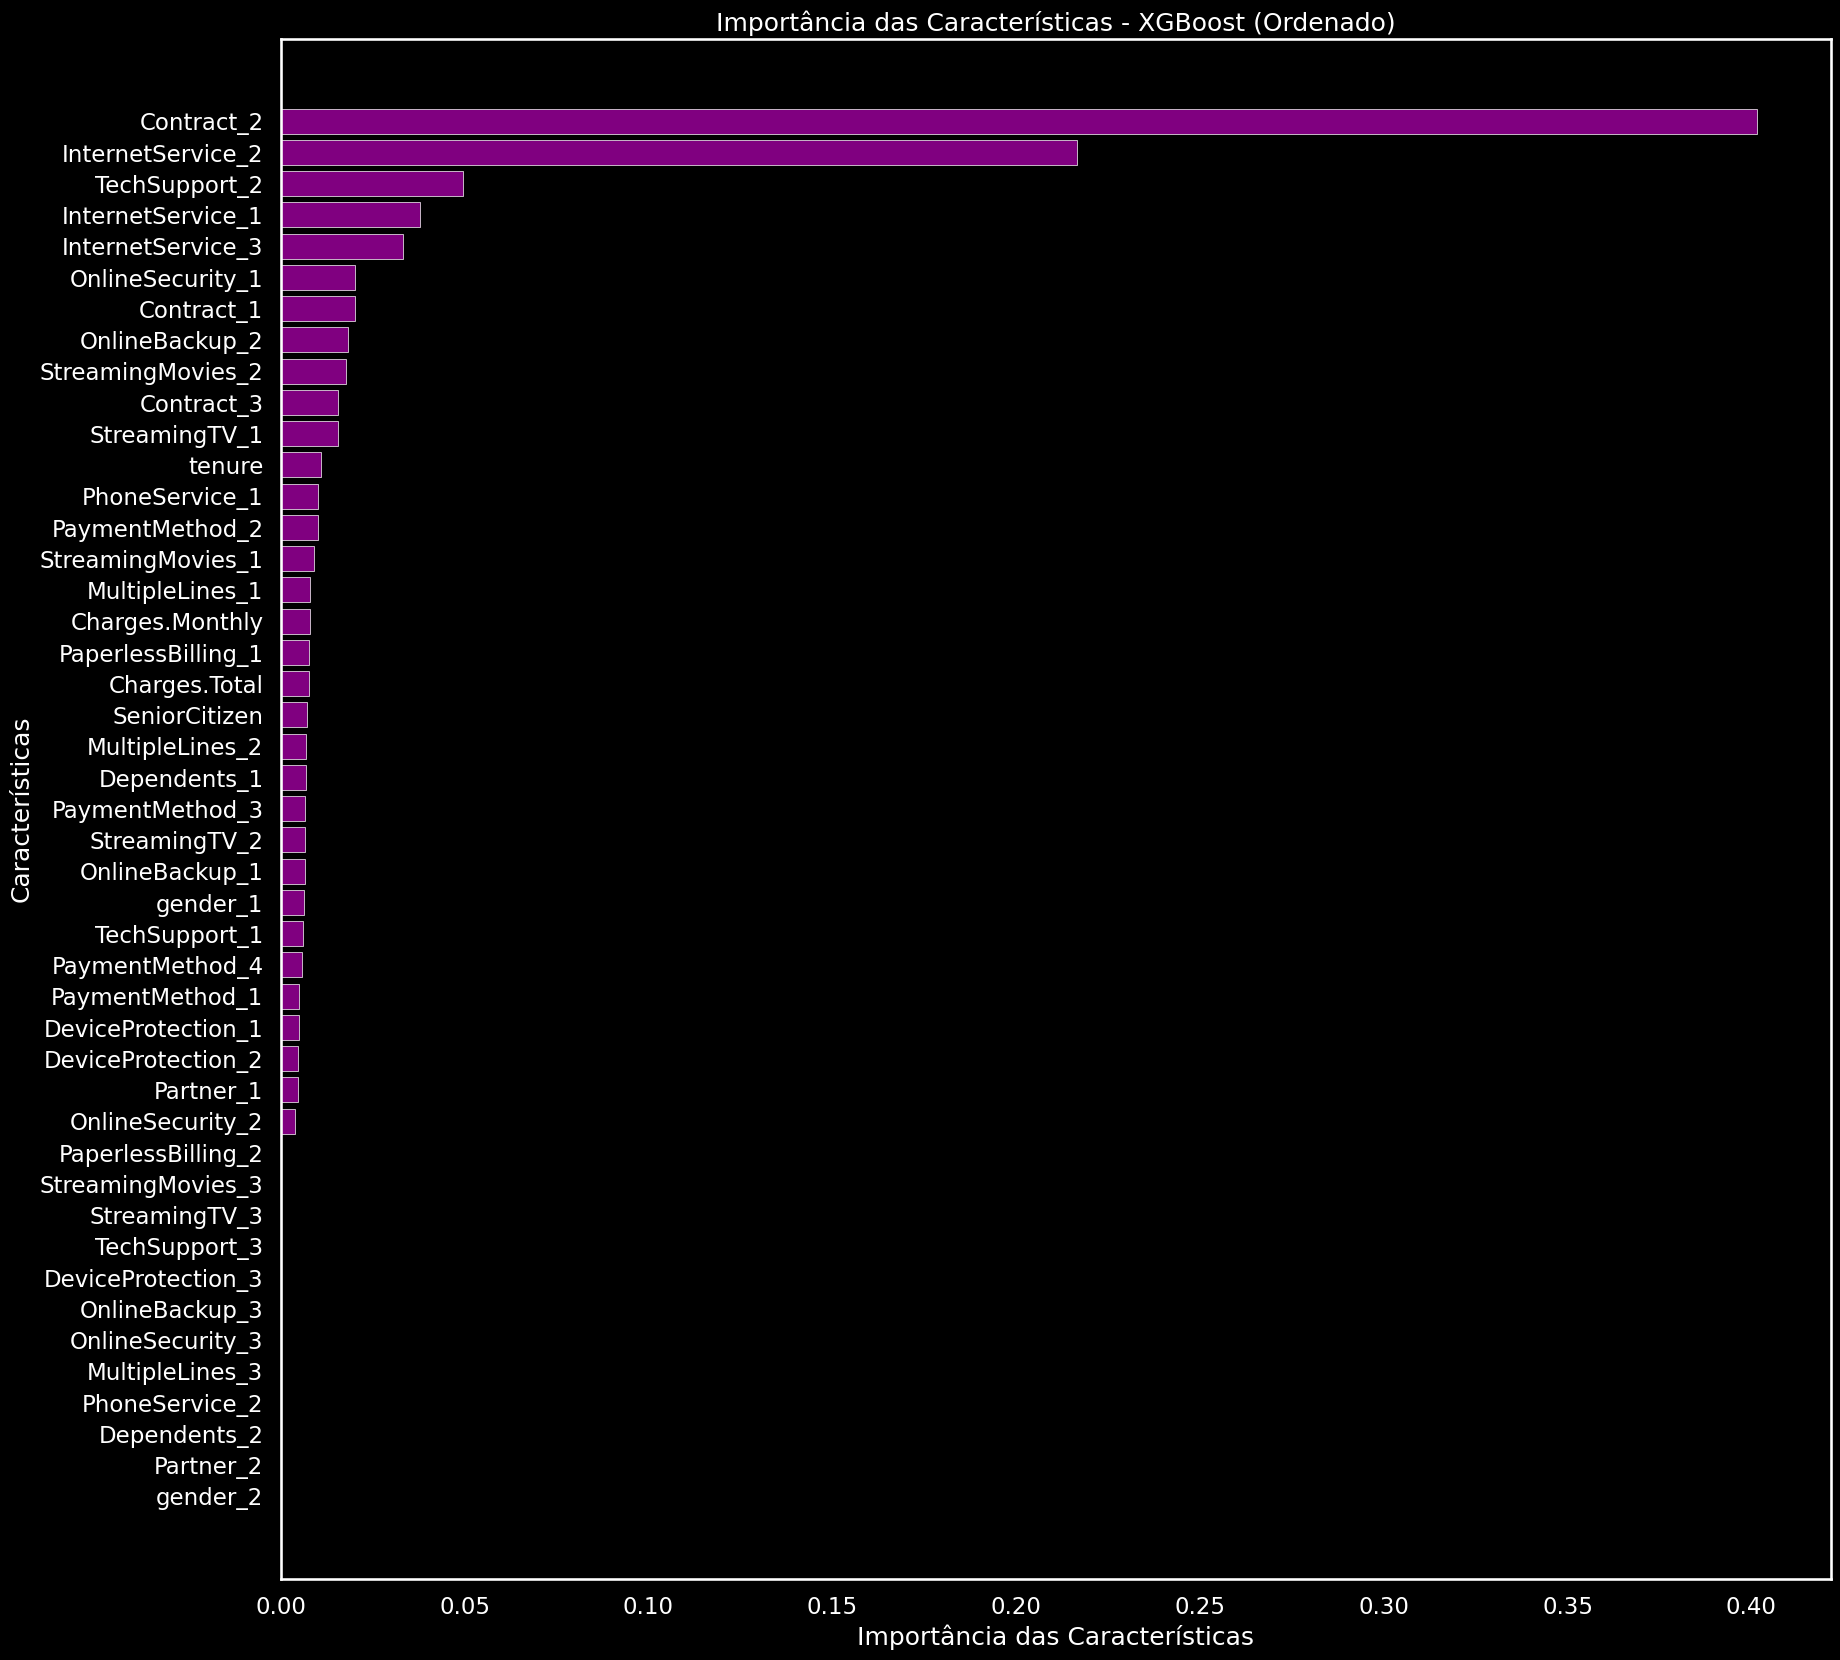

In [60]:

from xgboost import plot_importance

modelo_XGBC2 = XGBClassifier()
modelo_XGBC2.fit(x_train2, y_train2)

# Obtenha a importância das características
importancias = modelo_XGBC2.feature_importances_

# Obtenha os nomes das características
nomes_caracteristicas = x_train2.columns

# Combine os nomes das características e suas importâncias
caracteristicas_importancias = list(zip(nomes_caracteristicas, importancias))

# Ordene as características com base na importância (do maior para o menor)
caracteristicas_importancias.sort(key=lambda x: x[1], reverse=False)

# Separe as características e as importâncias ordenadas
nomes_caracteristicas_ordenadas, importancias_ordenadas = zip(*caracteristicas_importancias)

# Crie um gráfico de barras para visualizar a importância das características ordenadas
plt.figure(figsize=(20, 20))
plt.barh(nomes_caracteristicas_ordenadas, importancias_ordenadas, color ="purple",linewidth=0.5)
plt.xlabel('Importância das Características')
plt.ylabel('Características')
plt.title('Importância das Características - XGBoost (Ordenado)')
plt.show()


<h2>Aplicando os oarametros tunnados ao modelo com melhor performance RandomForestClassifier</h2>

In [61]:
modelo_RFC3 = RandomForestClassifier(n_estimators = 50, min_samples_split = 3, min_samples_leaf = 1, max_depth = 20, bootstrap = False,  n_jobs=-1)
modelo_RFC3.fit(x_train2, y_train2)
y_pred_tunning = modelo_RFC3.predict(x_test2)
print("Resultado Modelo RandomForest Tunado:\n\n"    , classification_report(y_test2, y_pred_tunning))

Resultado Modelo RandomForest Tunado:

               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1522
           1       0.86      0.92      0.89      1576

    accuracy                           0.88      3098
   macro avg       0.88      0.88      0.88      3098
weighted avg       0.88      0.88      0.88      3098



In [62]:
import pickle

# Nome do arquivo onde você deseja salvar o modelo
nome_arquivo = 'modelo_RFC3.pkl'

# Salve o modelo em um arquivo pickle
with open(nome_arquivo, 'wb') as arquivo_pkl:
    pickle.dump(modelo_RFC3, arquivo_pkl)

print(f"O modelo foi salvo em {nome_arquivo}")


O modelo foi salvo em modelo_RFC3.pkl
